### Create table and Insert values using Cursor object

In [28]:
# Python code to demonstrate table creation and 
# insertions with SQL 

# importing module 
import sqlite3 

# connecting to the database 
connection = sqlite3.connect("myTable.db") 

# cursor 
crsr = connection.cursor() 

# SQL command to create a table in the database 
sql_command = """CREATE TABLE emp ( 
staff_number INTEGER PRIMARY KEY, 
fname VARCHAR(20), 
lname VARCHAR(30), 
gender CHAR(1), 
joining DATE);"""

# execute the statement 
crsr.execute(sql_command) 

# SQL command to insert the data in the table 
sql_command = """INSERT INTO emp VALUES (23, "Rishabh", "Bansal", "M", "2014-03-28");"""
crsr.execute(sql_command) 

# another SQL command to insert the data in the table 
sql_command = """INSERT INTO emp VALUES (1, "Bill", "Gates", "M", "1980-10-28");"""
crsr.execute(sql_command) 

# To save the changes in the files. Never skip this. 
# If we skip this, nothing will be saved in the database. 
connection.commit() 

# close the connection 
connection.close() 


### Retrieving values from DB using cursor fetchall() method

In [40]:
# connect withe the myTable database 
connection = sqlite3.connect("myTable.db") 
  
# cursor object 
crsr = connection.cursor() 
  
# execute the command to fetch all the data from the table emp 
crsr.execute("SELECT * FROM emp")  
  
# store all the fetched data in the ans variable 
ans= crsr.fetchall()  
#print(ans)

# loop to print all the data 
for i in ans: 
    print(i) 

(1, 'Bill', 'Gates', 'M', '1980-10-28')


### Updating DB using connect.execute() method

In [35]:
# database name to be passed as parameter 
conn = sqlite3.connect('myTable.db') 

# update the student record 
conn.execute("UPDATE emp SET fname = 'Sam' where staff_number='23'") 
conn.commit() 

print("Total number of rows updated :", conn.total_changes)

cursor = conn.execute("SELECT * FROM emp") 
for row in cursor: 
    print(row) 

conn.close() 


Total number of rows updated : 1
(1, 'Bill', 'Gates', 'M', '1980-10-28')
(23, 'Sam', 'Bansal', 'M', '2014-03-28')


### Delete rows from DB using connect.execute() method

In [37]:
# database name to be passed as parameter 
conn = sqlite3.connect('myTable.db') 

# delete student record from database 
conn.execute("DELETE from emp where staff_number='23'") 
conn.commit() 

print("Total number of rows deleted :", conn.total_changes)

cursor = conn.execute("SELECT * FROM emp") 
for row in cursor: 
    print(row)

conn.close() 

Total number of rows deleted : 1
(1, 'Bill', 'Gates', 'M', '1980-10-28')


### Creating table in memory and inserting values with user input

In [43]:
# creates a database in RAM 
con = sqlite3.connect(":memory:") 
cur = con.cursor() 
cur.execute("create table person (name, age, id)") 

print("Enter 5 students names:") 
who = [input() for i in range(5)] 
print("Enter their ages respectively:") 
age = [int(input()) for i in range(5)] 
print("Enter their ids respectively:") 
p_id = [int(input()) for i in range(5)] 
n = len(who) 

for i in range(n): 

    # This is the q-mark style: 
    cur.execute("insert into person values (?, ?, ?)", (who[i], age[i], p_id[i])) 

    # And this is the named style: 
    cur.execute("select * from person") 

    # Fetches all entries from table 
    print(cur.fetchall())


Enter 5 students names:
ram
shyam
ravi
gopi
anand
Enter their ages respectively:
20
21
22
23
24
Enter their ids respectively:
101
102
103
104
105
[('ram', 20, 101)]
[('ram', 20, 101), ('shyam', 21, 102)]
[('ram', 20, 101), ('shyam', 21, 102), ('ravi', 22, 103)]
[('ram', 20, 101), ('shyam', 21, 102), ('ravi', 22, 103), ('gopi', 23, 104)]
[('ram', 20, 101), ('shyam', 21, 102), ('ravi', 22, 103), ('gopi', 23, 104), ('anand', 24, 105)]


### Plotting user input data

Enter 5 students names:
ram
ravi
shyam
gopi
anand
Enter their ages respectively:
20
21
22
23
24
Enter their ids respectively:
101
102
103
104
105


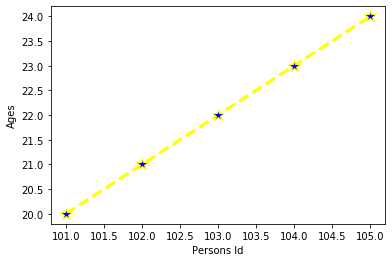

In [44]:
# graph visualization using matplotlib library 
import matplotlib.pyplot as plt 

def graph_data(p_id,age): 

    # plotting the points 
    plt.plot(p_id, age, color='yellow', linestyle='dashed', linewidth = 3, 
    marker='*', markerfacecolor='blue', markersize=12) 

    # naming the x axis 
    plt.xlabel('Persons Id') 

    # naming the y axis 
    plt.ylabel('Ages') 

    # plt.plot(p_id,age) 
    plt.show() 

print("Enter 5 students names:") 
who = [input() for i in range(5)] 
print("Enter their ages respectively:") 
age = [int(input()) for i in range(5)] 
print("Enter their ids respectively:") 
p_id = [int(input()) for i in range(5)] 

# calling graph function 
graph_data(p_id,age) 


### ExecuteScript() method of cursor

In [45]:
import sqlite3 

# Connection with the DataBase 
# 'library.db' 
connection = sqlite3.connect("library.db") 
cursor = connection.cursor() 

# SQL piece of code Executed 
# SQL piece of code Executed 
cursor.executescript(""" 
    CREATE TABLE people( 
        firstname, 
        lastname, 
        age 
    ); 

    CREATE TABLE book( 
        title, 
        author, 
        published 
    ); 

    INSERT INTO 
    book(title, author, published) 
    VALUES ( 
        'Dan Clarke''s GFG Detective Agency', 
        'Sean Simpsons', 
        1987 
    ); 
    """) 

sql = """ 
SELECT COUNT(*) FROM book;"""

cursor.execute(sql) 

# The output in fetched and returned 
# as a List by fetchall() 
result = cursor.fetchall() 
print(result) 

sql = """ 
SELECT * FROM book;"""

cursor.execute(sql) 

result = cursor.fetchall() 
print(result) 

# Changes saved into database 
connection.commit() 

# Connection closed(broken) 
# with DataBase 
connection.close() 

[(1,)]
[("Dan Clarke's GFG Detective Agency", 'Sean Simpsons', 1987)]


### executemany() method of connect

In [46]:
import sqlite3 

# Connection with the DataBase 
# 'library.db' 
connection = sqlite3.connect("library1.db") 
cursor = connection.cursor() 

# SQL piece of code Executed 
cursor.execute(""" 

    CREATE TABLE book( 
        title, 
        author, 
        published);""") 

List = [('A', 'B', 2008), ('C', 'D', 2008), 
        ('E', 'F', 2010)] 

connection. executemany(""" 

    INSERT INTO 
    book(title, author, published) 
    VALUES (?, ?, ?)""", List) 

sql = """ 
    SELECT * FROM book;"""

cursor.execute(sql) 
result = cursor.fetchall() 
for x in result: 
    print(x) 

# Changes saved into database 
connection.commit() 

# Connection closed(broken) 
# with DataBase 
connection.close() 


('A', 'B', 2008)
('C', 'D', 2008)
('E', 'F', 2010)


### Fetching big data from DB using connect.execute() and cursor.fetchall()

In [47]:
import sqlite3 

# Connection created with the 
# database using sqlite3.connect() 
connection = sqlite3.connect("company.db") 
cursor = connection.cursor() 

# Create Table command executed 
sql = """ 
        CREATE TABLE employee ( 
        ID INTEGER PRIMARY KEY, 
        fname VARCHAR(20), 
        lname VARCHAR(30), 
        gender CHAR(1), 
        dob DATE);"""
cursor.execute(sql) 

# Single Tuple inserted 
sql = """ 
        INSERT INTO employee 
        VALUES (1007, "Will", "Olsen", "M", "24-SEP-1865");"""
cursor.execute(sql) 

# Multiple Rows inserted 
List = [(1008, 'Rkb', 'Boss', 'M', "27-NOV-1864"), 
        (1098, 'Sak', 'Rose', 'F', "27-DEC-1864"), 
        (1908, 'Royal', 'Bassen', "F", "17-NOV-1894")] 

connection. executemany( 
        "INSERT INTO employee VALUES (?, ?, ?, ?, ?)", List) 

print("Method-1\n") 

# Multiple Rows fetched from 
# the Database 
for row in connection.execute('SELECT * FROM employee ORDER BY ID'): 
    print (row) 

print("\nMethod-2\n") 

# Method-2 to fetch multiple 
# rows 
sql = """ 
        SELECT * FROM employee ORDER BY ID;"""

cursor.execute(sql) 
result = cursor.fetchall() 

for x in result: 
    print(x) 

connection.commit() 
connection.close() 

Method-1

(1007, 'Will', 'Olsen', 'M', '24-SEP-1865')
(1008, 'Rkb', 'Boss', 'M', '27-NOV-1864')
(1098, 'Sak', 'Rose', 'F', '27-DEC-1864')
(1908, 'Royal', 'Bassen', 'F', '17-NOV-1894')

Method-2

(1007, 'Will', 'Olsen', 'M', '24-SEP-1865')
(1008, 'Rkb', 'Boss', 'M', '27-NOV-1864')
(1098, 'Sak', 'Rose', 'F', '27-DEC-1864')
(1908, 'Royal', 'Bassen', 'F', '17-NOV-1894')


Reference: https://www.geeksforgeeks.org/sql-using-python/